In [82]:
import pandas as pd
from matplotlib import pyplot as plt

#read the data
daily_cases = pd.read_csv('https://covid.ourworldindata.org/data/total_cases.csv')
total_cases = pd.read_csv('https://covid.ourworldindata.org/data/total_cases.csv')

#do a split-up
Total_cases_world = total_cases.loc[total_cases['Entity'] == 'Worldwide']
Total_cases_ch = total_cases.loc[total_cases['Entity'] == 'China']
Total_cases_int = total_cases.loc[total_cases['Entity'] == 'International']

#exclude Worldwide & china from graph
total_cases = total_cases.loc[total_cases['Entity'] != 'Worldwide']
total_cases = total_cases.loc[total_cases['Entity'] != 'China']
total_cases = total_cases.loc[total_cases['Entity'] != 'International']

#add missing data for day 51 /52 /53
df2= pd.DataFrame([
    ['Netherlands', 'NLD', 51 , 503], 
    ['Netherlands', 'NLD', 52 , 614], 
    ['Netherlands', 'NLD', 53 , 804],
    ['Spain', 'SP', 52 , 3004], 
    ['Spain', 'SP', 53 , 4209],
    ['Italy', 'IT', 51 , 12462], 
    ['Italy', 'IT', 52 , 15113],
    ['South Korea', 'SK', 51 , 7755],
    ['South Korea', 'SK', 52 , 7869],
    ['Iran', 'IR', 51 , 9000],
    ['Iran', 'IR', 52 , 10075],
    ['France', 'FR', 51 , 2281],
    ['France', 'FR', 52 , 2876],
    ['Germany', 'D', 51 , 1966],
    ['Germany', 'D', 52 , 2745],
    ['United States', 'US', 51 , 1301],
    ['United States', 'US', 52 , 1697],
], columns=total_cases.columns)
total_cases = total_cases.append(df2)

#do a cut-off for china
Total_cases_ch = Total_cases_ch.loc[Total_cases_ch['Total confirmed cases of COVID-19'] <= 25000]

#make country list
country_list = list(set((total_cases['Entity'])))

# Only include countries with more then x cases on the last date in the dataset
threshold = 50
for item in country_list:
    if list(total_cases.loc[total_cases['Entity'] == item]['Total confirmed cases of COVID-19'])[-1] <= threshold:
        total_cases = total_cases.loc[total_cases['Entity'] != item]
        
        
#make new country_list
new_country_list = sorted(list(set((total_cases['Entity']))))

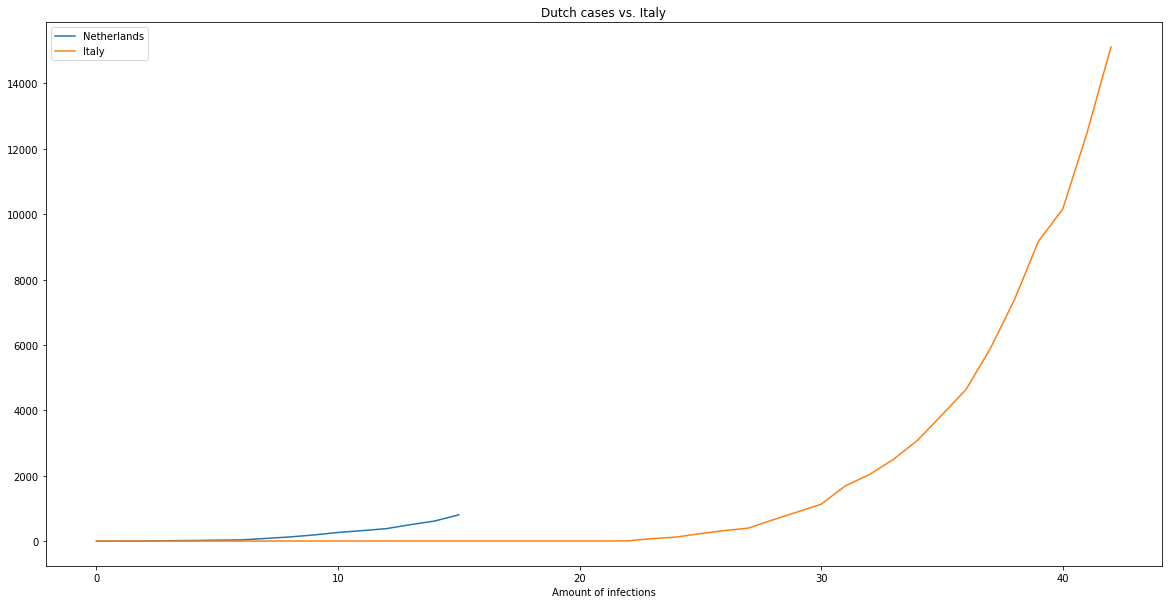

In [83]:
# plot dutch cases against Italian cases
country_list = ['Netherlands', 'Italy']
plt.figure(figsize=(20,10))
for item in country_list:
    x = total_cases.loc[total_cases['Entity'] == item]['Year']
    x = [day - list(total_cases.loc[total_cases['Entity'] == item]['Year'])[0] for day in x]
    plt.plot(x,total_cases.loc[total_cases['Entity'] == item]['Total confirmed cases of COVID-19'], label=item)

plt.xlabel("Amount of infections")
plt.title("Dutch cases vs. Italy")
plt.legend()
plt.show()

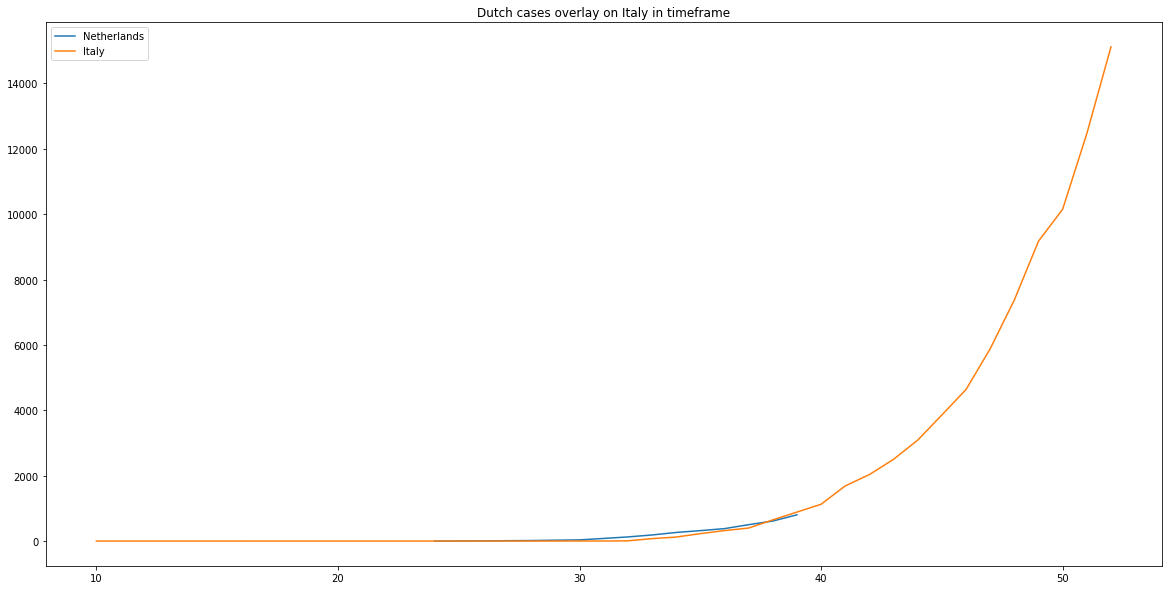

In [84]:
#what if we overlay NL on IT in time?
x_nl = total_cases.loc[total_cases['Entity'] == 'Netherlands']['Year']
shift = 14 # to overlay NL on IT
x_nl = [item - shift for item in x_nl]
y_nl = total_cases.loc[total_cases['Entity'] == 'Netherlands']['Total confirmed cases of COVID-19']

x_it = total_cases.loc[total_cases['Entity'] == 'Italy']['Year']
y_it = total_cases.loc[total_cases['Entity'] == 'Italy']['Total confirmed cases of COVID-19'] 

plt.figure(figsize=(20,10))
plt.plot(x_nl, y_nl, label='Netherlands')
plt.plot(x_it, y_it, label='Italy')
plt.title("Dutch cases overlay on Italy in timeframe")
plt.legend()
plt.show()


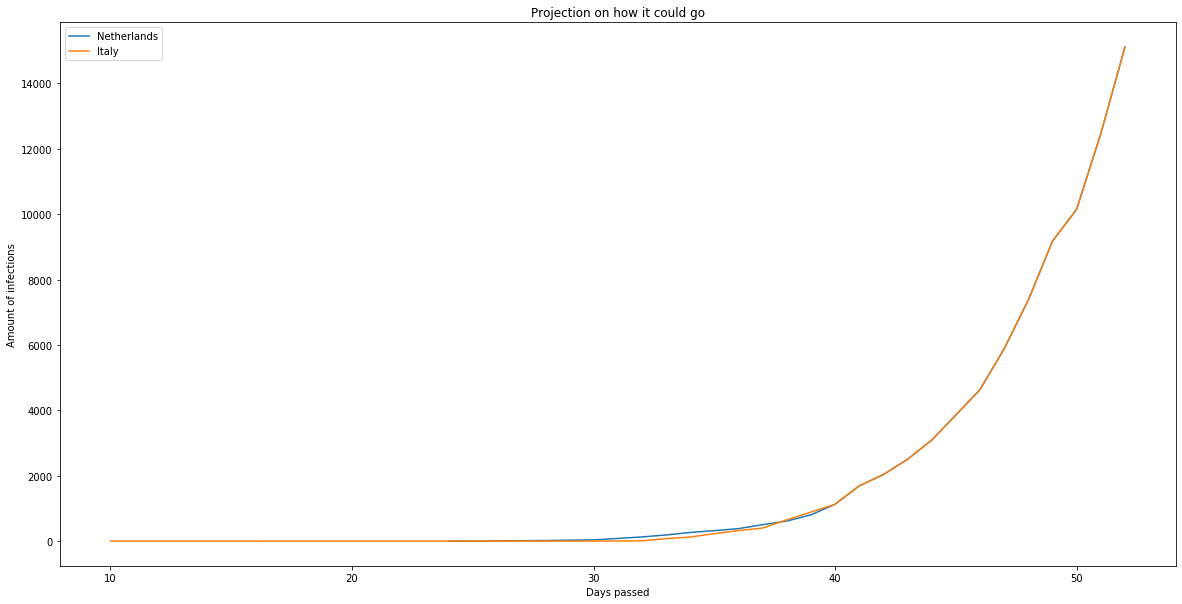

In [85]:
# make comparison on how it could go
x_nl1 = x_nl + list(x_it[30:])
y_nl1 = list(y_nl) + list(y_it)[30:]

plt.figure(figsize=(20,10))
plt.plot(x_nl1, y_nl1, label='Netherlands')
plt.plot(x_it, y_it, label='Italy')
plt.xlabel('Days passed')
plt.ylabel('Amount of infections')
plt.title("Projection on how it could go")
plt.legend()
plt.show()



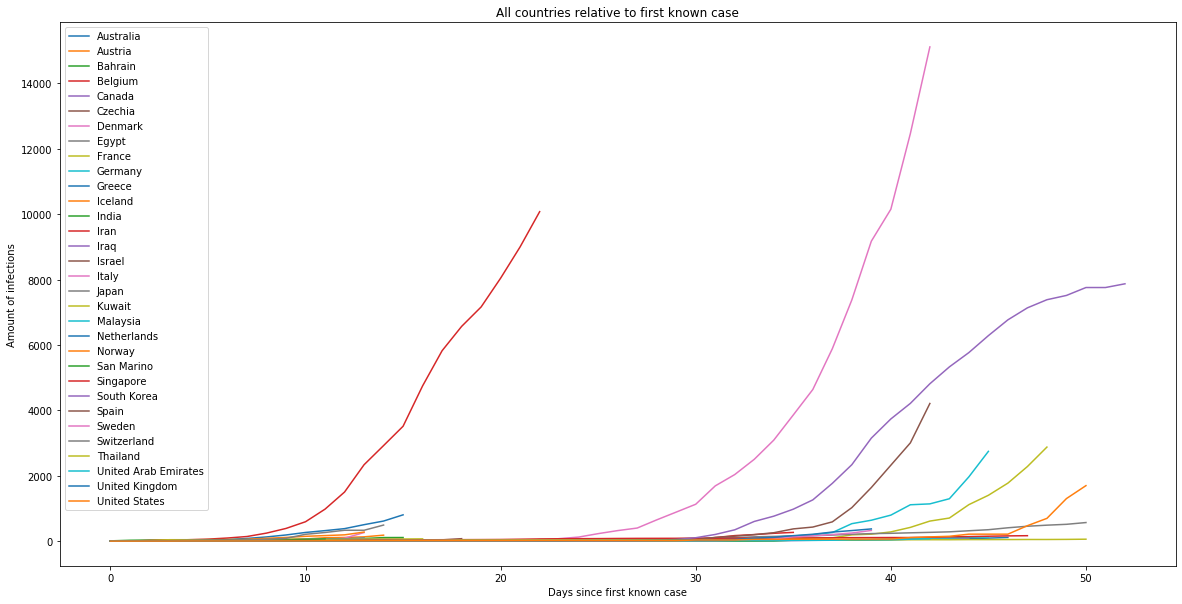

In [86]:
#plot all the countries
plt.figure(figsize=(20,10))
for item in new_country_list:
    x = total_cases.loc[total_cases['Entity'] == item]['Year']
    x = [day - list(total_cases.loc[total_cases['Entity'] == item]['Year'])[0] for day in x]
    plt.plot(x,total_cases.loc[total_cases['Entity'] == item]['Total confirmed cases of COVID-19'], label=item)

plt.ylabel("Amount of infections")
plt.xlabel("Days since first known case")
plt.title("All countries relative to first known case")
plt.legend()
plt.show()

In [87]:
#lets make it more interactive with plotly
import plotly.graph_objects as go
traces_list = []
for item in new_country_list:
    x = total_cases.loc[total_cases['Entity'] == item]['Year']
    x = [day - list(total_cases.loc[total_cases['Entity'] == item]['Year'])[0] for day in x]

    trace = go.Scatter(x=x,
            y=total_cases.loc[total_cases['Entity'] == item]['Total confirmed cases of COVID-19'],
            name = item,
            )
    traces_list.append(trace)

Layout = go.Layout(xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   yaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   xaxis_title="Days since outbreak",
                   yaxis_title="Amount of infected",
                    )

fig = go.Figure(data=traces_list, layout=Layout)
fig

In [88]:
#do a split-up
total_cases = total_cases.loc[total_cases['Year'] >= 28] #start at day 28, when there seems to be the much activation of other countries

import plotly.graph_objects as go
traces_list = []
for item in new_country_list:
    x = total_cases.loc[total_cases['Entity'] == item]['Year']
    #x = [day - list(total_cases.loc[total_cases['Entity'] == item]['Year'])[0] for day in x]

    trace = go.Scatter(x=x,
            y=total_cases.loc[total_cases['Entity'] == item]['Total confirmed cases of COVID-19'],
            name = item,
            )
    traces_list.append(trace)

Layout = go.Layout(xaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   yaxis=dict(showgrid=True, zeroline=True, showticklabels=True),
                   xaxis_title="Days since outbreak",
                   yaxis_title="Amount of infected",
                    )

fig = go.Figure(data=traces_list, layout=Layout)
fig

In [89]:
daily_cases

,Entity,Code,Year,Daily new confirmed cases of COVID-19
0,Afghanistan,AFG,36,0
1,Afghanistan,AFG,37,0
2,Afghanistan,AFG,38,0
3,Afghanistan,AFG,39,0
4,Afghanistan,AFG,40,0
...,...,...,...,...
1905,Worldwide,NaN,46,3730
1906,Worldwide,NaN,47,3644
1907,Worldwide,NaN,48,3979
1908,Worldwide,NaN,49,4119
